# **GELDIUM-DELINQUENCY-PREDICTION**

In [2]:

# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report
)
import warnings
warnings.filterwarnings('ignore')


print("Libraries imported successfully!")


Libraries imported successfully!


In [3]:

# Load Dataset
dataset_path = "Delinquency_prediction_dataset.csv"
df = pd.read_csv(dataset_path)
df

print("Dataset loaded successfully!")


Dataset loaded successfully!


In [4]:
# Display basic information
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [5]:
# Show first few rows
print(df.head())



  Customer_ID  Age    Income  Credit_Score  Credit_Utilization  \
0    CUST0001   56  165580.0         398.0            0.390502   
1    CUST0002   69  100999.0         493.0            0.312444   
2    CUST0003   46  188416.0         500.0            0.359930   
3    CUST0004   32  101672.0         413.0            0.371400   
4    CUST0005   60   38524.0         487.0            0.234716   

   Missed_Payments  Delinquent_Account  Loan_Balance  Debt_to_Income_Ratio  \
0                3                   0       16310.0              0.317396   
1                6                   1       17401.0              0.196093   
2                0                   0       13761.0              0.301655   
3                3                   0       88778.0              0.264794   
4                2                   0       13316.0              0.510583   

  Employment_Status  Account_Tenure Credit_Card_Type     Location Month_1  \
0               EMP              18          Student  Los

In [6]:
df.shape

(500, 19)

In [7]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())




Missing Values:
 Customer_ID              0
Age                      0
Income                  39
Credit_Score             2
Credit_Utilization       0
Missed_Payments          0
Delinquent_Account       0
Loan_Balance            29
Debt_to_Income_Ratio     0
Employment_Status        0
Account_Tenure           0
Credit_Card_Type         0
Location                 0
Month_1                  0
Month_2                  0
Month_3                  0
Month_4                  0
Month_5                  0
Month_6                  0
dtype: int64


In [8]:
df['Income'].fillna(df['Income'].median(),inplace=True)
df['Credit_Score'].fillna(df['Credit_Score'].mean(),inplace=True)

In [9]:
loan_mean=df["Loan_Balance"].mean()
loan_std=df["Loan_Balance"].std()

np.random.seed(42)  # For reproducibility
synthetic_loan_values=np.random.normal(loc=loan_mean,scale=loan_std,size=df["Loan_Balance"].isnull().sum())



In [10]:
# Apply synthetic values to missing rows
df.loc[df["Loan_Balance"].isnull(),"Loan_Balance_imputed"]=synthetic_loan_values
df.loc[df["Loan_Balance"].notnull(),"Loan_Balance_imputed"]=df["Loan_Balance"]
df["Loan_Balance"]=df["Loan_Balance_imputed"]
df.drop(columns=["Loan_Balance_imputed"],inplace=True)

In [11]:
print("Remaining missing values:\n", df.isnull().sum())

Remaining missing values:
 Customer_ID             0
Age                     0
Income                  0
Credit_Score            0
Credit_Utilization      0
Missed_Payments         0
Delinquent_Account      0
Loan_Balance            0
Debt_to_Income_Ratio    0
Employment_Status       0
Account_Tenure          0
Credit_Card_Type        0
Location                0
Month_1                 0
Month_2                 0
Month_3                 0
Month_4                 0
Month_5                 0
Month_6                 0
dtype: int64


In [12]:
df.describe()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,46.266000,108323.586000,577.716867,0.491446,2.968000,0.160000,48339.737118,0.298862,9.740000
std,16.187629,51523.389667,168.542432,0.197103,1.946935,0.366973,29260.026806,0.094521,5.923054
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,-7587.471871,0.100000,0.000000
25%,33.000000,67610.500000,418.750000,0.356486,1.000000,0.000000,23732.250000,0.233639,5.000000
50%,46.500000,107658.000000,584.000000,0.485636,3.000000,0.000000,45342.000000,0.301634,10.000000
75%,59.250000,152572.250000,725.750000,0.634440,5.000000,0.000000,74410.500000,0.362737,15.000000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,1.000000,99620.000000,0.552956,19.000000


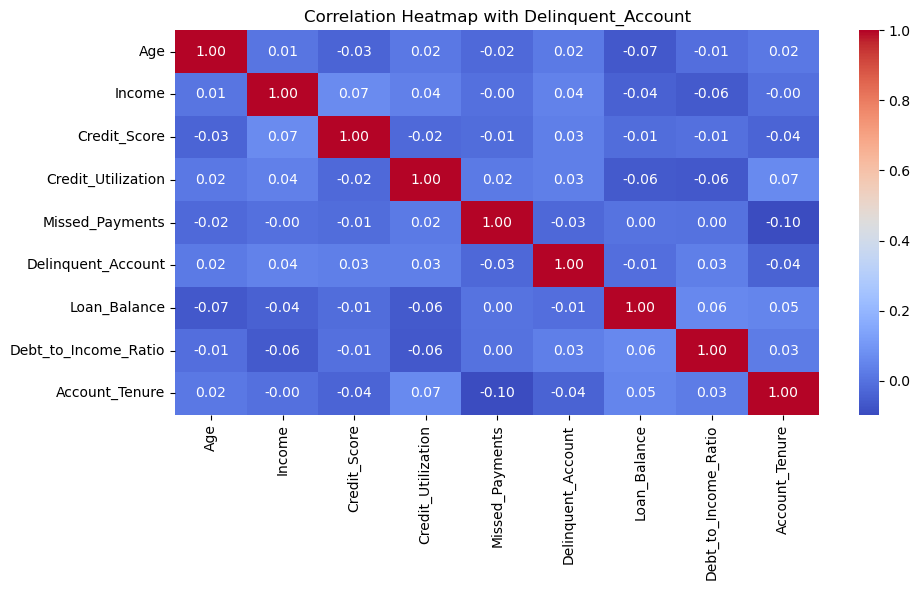

In [13]:
correlation_matrix = df.corr(numeric_only=True)
correlation_with_target=correlation_matrix["Delinquent_Account"].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap with Delinquent_Account")
plt.tight_layout()
plt.show()


In [14]:
# Check unique values in "Action"
print("\nUnique values in 'Delinquent_Account':\n", df["Delinquent_Account"].value_counts())




Unique values in 'Delinquent_Account':
 Delinquent_Account
0    420
1     80
Name: count, dtype: int64


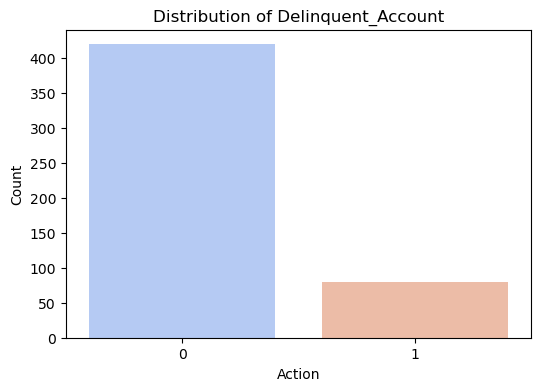

In [15]:
# Visualize "Delinquent_Account" distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Delinquent_Account"], palette="coolwarm")
plt.title("Distribution of Delinquent_Account")
plt.xlabel("Action")
plt.ylabel("Count")
plt.show()



In [16]:
# Compute and plot correlation matrix
correlations =df.corr(numeric_only=True)["Delinquent_Account"].sort_values(ascending=False)
print("\nCorrelation with Delinquent_Account:")
correlations =df.corr(numeric_only=True)["Delinquent_Account"].sort_values(ascending=False)
print(correlations)



Correlation with Delinquent_Account:
Delinquent_Account      1.000000
Income                  0.043991
Credit_Score            0.034820
Debt_to_Income_Ratio    0.034386
Credit_Utilization      0.034224
Age                     0.022508
Loan_Balance           -0.009730
Missed_Payments        -0.026478
Account_Tenure         -0.039829
Name: Delinquent_Account, dtype: float64


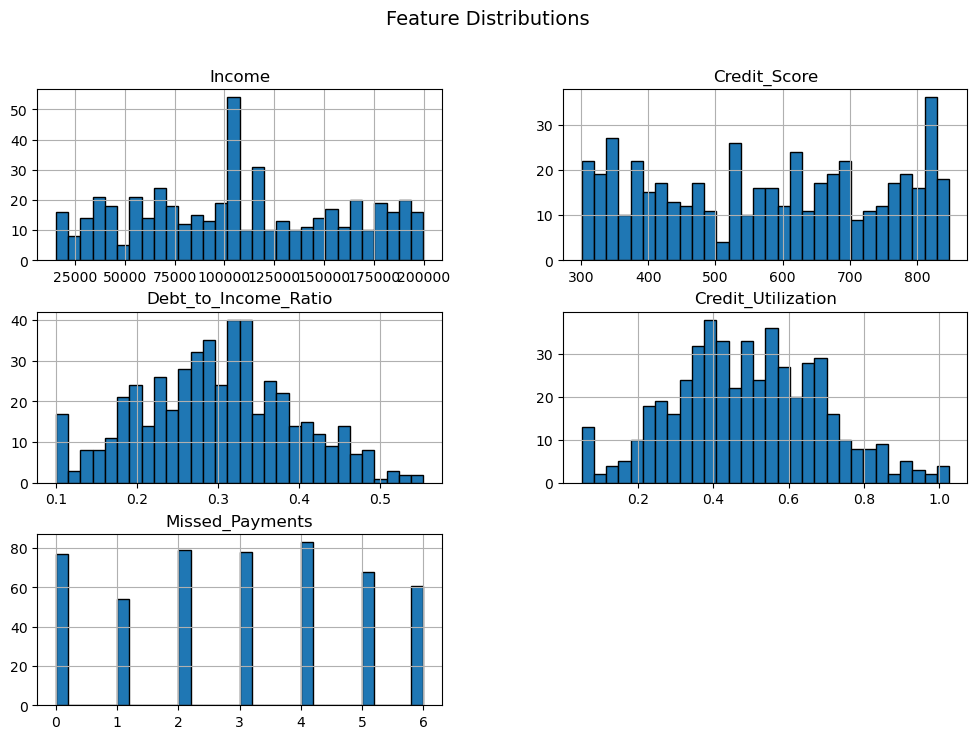

In [17]:
# Feature distributions
num_features = ["Income", "Credit_Score", "Debt_to_Income_Ratio", "Credit_Utilization", "Missed_Payments"]
df[num_features].hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()



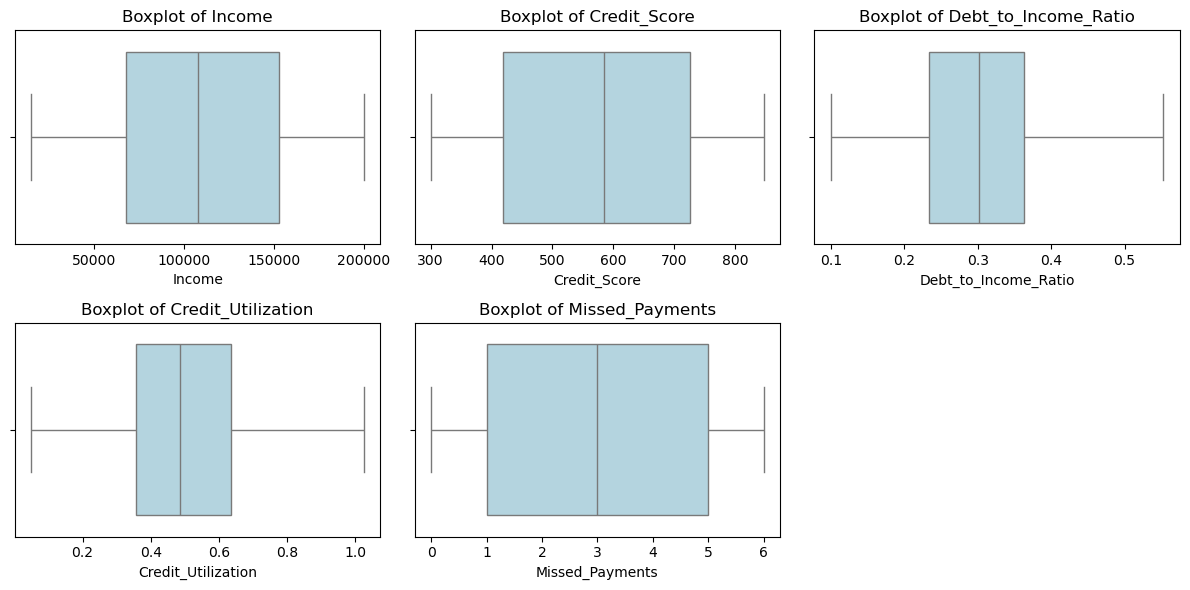

In [18]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature], color="lightblue")
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()



In [19]:
# Apply outlier removal
def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

In [20]:
# Apply outlier removal
df_cleaned = remove_outliers(df, num_features)

# Show new shape after outlier removal
print("\nDataset shape after outlier removal:", df_cleaned.shape)
df_cleaned.describe()



Dataset shape after outlier removal: (500, 19)


,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,46.266000,108323.586000,577.716867,0.491446,2.968000,0.160000,48339.737118,0.298862,9.740000
std,16.187629,51523.389667,168.542432,0.197103,1.946935,0.366973,29260.026806,0.094521,5.923054
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,-7587.471871,0.100000,0.000000
25%,33.000000,67610.500000,418.750000,0.356486,1.000000,0.000000,23732.250000,0.233639,5.000000
50%,46.500000,107658.000000,584.000000,0.485636,3.000000,0.000000,45342.000000,0.301634,10.000000
75%,59.250000,152572.250000,725.750000,0.634440,5.000000,0.000000,74410.500000,0.362737,15.000000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,1.000000,99620.000000,0.552956,19.000000


In [21]:
print("Class Distribution:\n", df["Delinquent_Account"].value_counts(normalize=True) * 100)


Class Distribution:
 Delinquent_Account
0    84.0
1    16.0
Name: proportion, dtype: float64


In [22]:
df_majority = df[df["Delinquent_Account"] == 0]  
df_minority= df[df["Delinquent_Account"] == 1]  
 

df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)


df_balanced_no_outliers = pd.concat([df_majority, df_minority_upsampled])
df_balanced_no_outliers = df_balanced_no_outliers.sample(frac=1, random_state=42).reset_index(drop=True)

print("Dataset balanced successfully!")
print(df_balanced_no_outliers['Delinquent_Account'].value_counts(normalize=True)*100)

Dataset balanced successfully!
Delinquent_Account
1    50.0
0    50.0
Name: proportion, dtype: float64


In [23]:
# Display processed dataset
print("\nProcessed Dataset:\n",df_balanced_no_outliers.head())




Processed Dataset:
   Customer_ID  Age    Income  Credit_Score  Credit_Utilization  \
0    CUST0310   47   90697.0         682.0            0.676443   
1    CUST0461   43  146800.0         459.0            0.671418   
2    CUST0038   32  181319.0         467.0            0.462184   
3    CUST0009   36   66991.0         405.0            0.413035   
4    CUST0111   18   43732.0         474.0            0.233754   

   Missed_Payments  Delinquent_Account  Loan_Balance  Debt_to_Income_Ratio  \
0                6                   1  46720.000000              0.243359   
1                4                   1  17913.000000              0.165185   
2                6                   0  62010.000000              0.380075   
3                5                   1  63255.608274              0.219854   
4                5                   0  76774.000000              0.239112   

  Employment_Status  Account_Tenure Credit_Card_Type     Location  Month_1  \
0          Employed              16

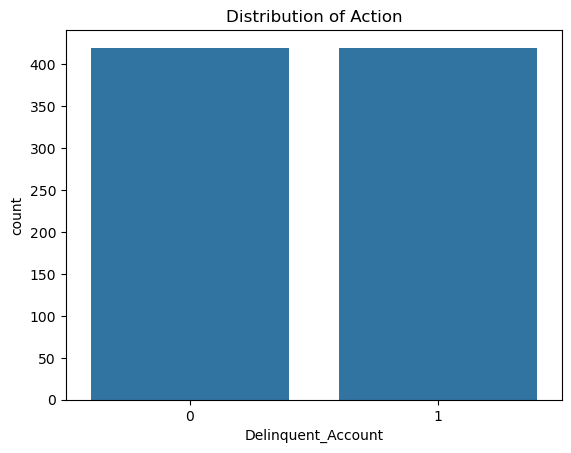

In [24]:
# Distribution of target variable
sns.countplot(x='Delinquent_Account', data=df_balanced_no_outliers)
plt.title('Distribution of Action')
plt.show()


In [25]:
data=df_balanced_no_outliers[["Income", "Credit_Score", "Debt_to_Income_Ratio", "Credit_Utilization", "Missed_Payments"]]
X=data
y = df_balanced_no_outliers["Delinquent_Account"]


In [26]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train-test split completed!")


Train-test split completed!


In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit only on training data
X_test_scaled = scaler.transform(X_test) 
print("Feature scaling applied!")


Feature scaling applied!


In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res,y_train_res = smote.fit_resample(X_train_scaled,y_train)
X_train_res

array([[-0.44379381, -0.29573215,  1.27428759,  1.03331633,  0.05054227],
       [-1.5367112 , -1.25778994,  1.83849484, -0.29087139,  1.07976668],
       [-1.25620465, -1.11700099, -0.29912175, -0.11656576,  0.56515448],
       ...,
       [ 1.43720497, -0.57731004,  0.65157848,  0.0156146 ,  0.56515448],
       [-0.23623627, -1.4161775 ,  0.58153859,  1.16074671,  0.05054227],
       [ 1.58383071, -1.4161775 ,  0.16890283, -0.05427454,  1.07976668]])

In [29]:
# Define models
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'AdaBoost': AdaBoostClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 30)


Model: KNN
Accuracy: 0.6904761904761905
Precision: 0.6454545454545455
Recall: 0.8452380952380952
Confusion Matrix:
 [[45 39]
 [13 71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.54      0.63        84
           1       0.65      0.85      0.73        84

    accuracy                           0.69       168
   macro avg       0.71      0.69      0.68       168
weighted avg       0.71      0.69      0.68       168

------------------------------
Model: Logistic Regression
Accuracy: 0.5357142857142857
Precision: 0.5333333333333333
Recall: 0.5714285714285714
Confusion Matrix:
 [[42 42]
 [36 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52        84
           1       0.53      0.57      0.55        84

    accuracy                           0.54       168
   macro avg       0.54      0.54      0.54       168
weighted avg       0.54      0.54   

In [30]:
from collections import Counter
print("Class Distribution:",Counter(y))

Class Distribution: Counter({1: 420, 0: 420})


<Axes: >

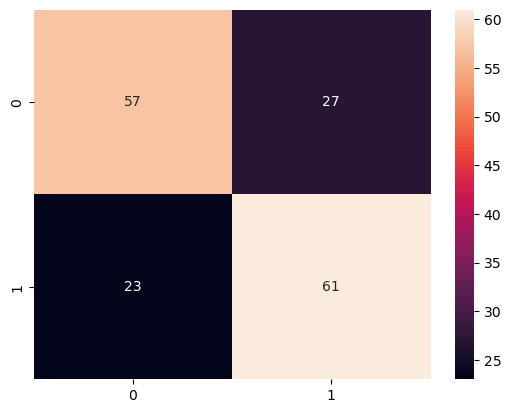

In [31]:
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True)


In [32]:
# Find misclassified samples
misclassified = np.where(y_test != y_pred)[0]

if len(misclassified) == 0:
    print("No misclassifications found!")
else:
    print(f"Misclassifications found: {len(misclassified)}")

Misclassifications found: 50


In [33]:
# Set threshold for high credit utilization (e.g., >30%)
high_util_threshold = 0.3

# Identify high credit utilization customers
high_util_customers = df[df['Credit_Utilization'] > high_util_threshold]

# Count and display result
print(f"Total high utilization customers: {len(high_util_customers)}")
print(f"Percentage of total: {(len(high_util_customers) / len(df)) * 100:.2f}%")


Total high utilization customers: 417
Percentage of total: 83.40%


In [34]:
# Check delinquency rate among them
high_util_delinquency_rate = high_util_customers['Delinquent_Account'].mean()
print(f"Delinquency rate among high utilization customers: {high_util_delinquency_rate:.2f}")

# Optional: simulate improvement scenario by reducing delinquency by 15%
improved_rate = high_util_delinquency_rate * 0.85
print(f"Targeted reduction goal (15% lower): {improved_rate:.2f}")

Delinquency rate among high utilization customers: 0.17
Targeted reduction goal (15% lower): 0.14


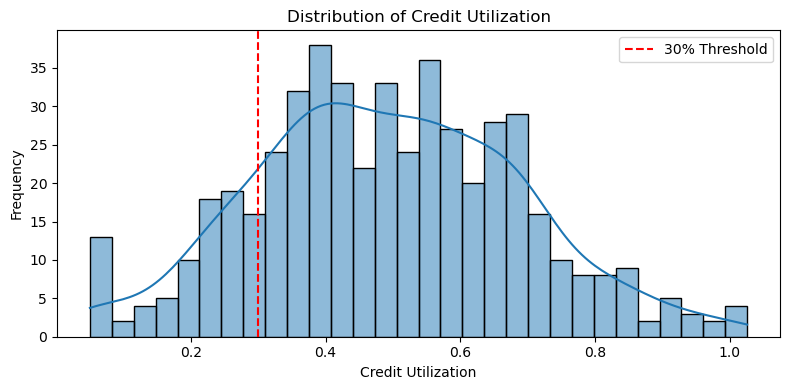

In [35]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Credit_Utilization', bins=30, kde=True)
plt.axvline(high_util_threshold, color='red', linestyle='--', label='30% Threshold')
plt.title('Distribution of Credit Utilization')
plt.xlabel('Credit Utilization')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
# Bias check across income segments
df['Income_Group'] = pd.qcut(df['Income'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

bias_check = df.groupby('Income_Group')['Delinquent_Account'].mean()
print("Delinquency Rate by Income Group:")
print(bias_check)

Delinquency Rate by Income Group:
Income_Group
Low         0.144000
Mid-Low     0.156463
Mid-High    0.194175
High        0.152000
Name: Delinquent_Account, dtype: float64


In [37]:
import joblib  # Recommended for sklearn models
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X_train.columns.tolist(), 'model_columns.pkl')

['model_columns.pkl']